In [1]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 29.4 MB/s eta 0:00:00


In [2]:
import igraph as ig
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from typing import Tuple

random.seed(0)

In [3]:
g = ig.Graph.Erdos_Renyi(n=900, p=0.015, directed=False)

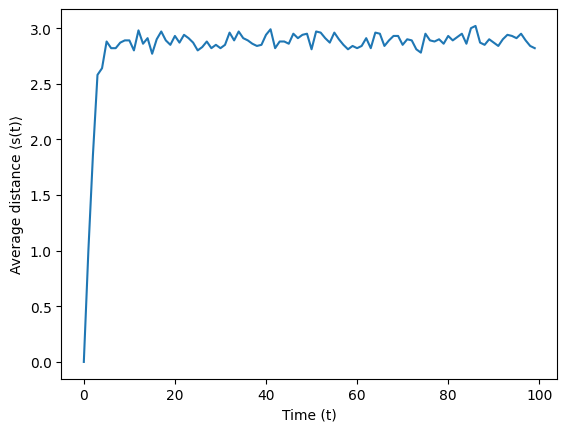

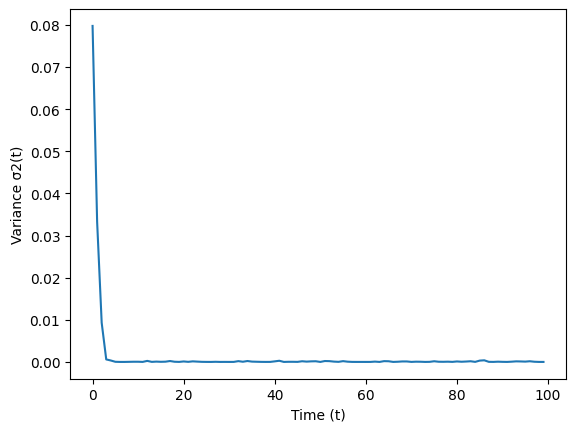

In [4]:
# Define the number of steps and repetitions
t_max = 100
repetitions = 100

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)

# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    
    # Perform the random walk for each time step
    for t in range(t_max):
        # Get the shortest path length from the starting node to current node
        s = g.distances(curr_node,start_node)[0]
        # Calculate the average and variance of the distance
        s_avg[t] += s
        # s_var[t] += s
        
        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
        
# Calculate the averages over all repetitions
s_avg /= repetitions
s_var = (s_avg - np.mean(s_avg))**2 / repetitions

# Plot the results
plt.plot(s_avg)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()

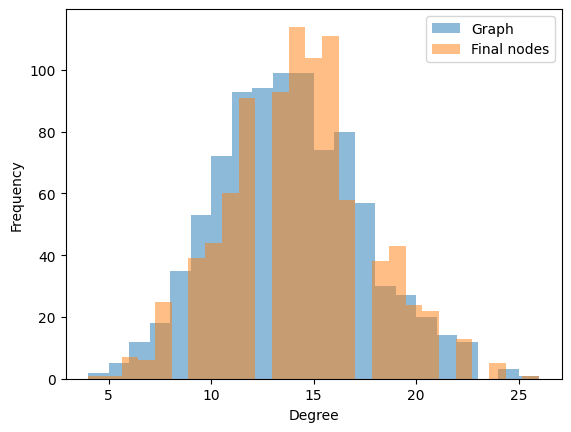

In [5]:
# number of steps and repetitions
t_max = 100
repetitions = 900
degrees = []

# random walks
for r in range(repetitions):
    # random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    
    # random walk
    for t in range(t_max):
        # random step
        neighbors = g.neighbors(curr_node)
        if len(neighbors) > 0:
            curr_node = np.random.choice(neighbors)
    
    # degree of the end node
    degrees.append(g.degree(curr_node))

plt.hist(g.degree(), bins="auto", alpha=0.5, label='Graph')
plt.hist(degrees, bins="auto", alpha=0.5, label='Final nodes')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
g = ig.Graph.Erdos_Renyi(n=9000, p=0.015, directed=False)

[2]

 59 59

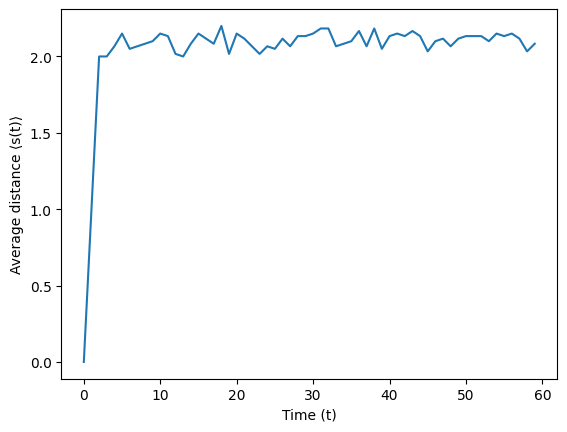

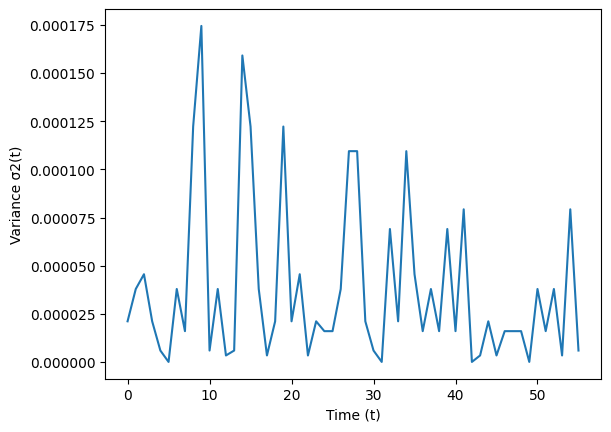

In [41]:
# Define the number of steps and repetitions
t_max = 60
repetitions = 60

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance

        s_avg[t] += np.mean(s)
        # s2_avg[t] += np.var(s)
        temp.append(s)
        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_var = (s_avg[2:]/repetitions - np.mean(s_avg[2:]/repetitions))**2 / repetitions
s_avg_p = s_avg / repetitions
#s_var = (s_avg - np.mean(s_avg))**2 / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var[2:])
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()

 59 59

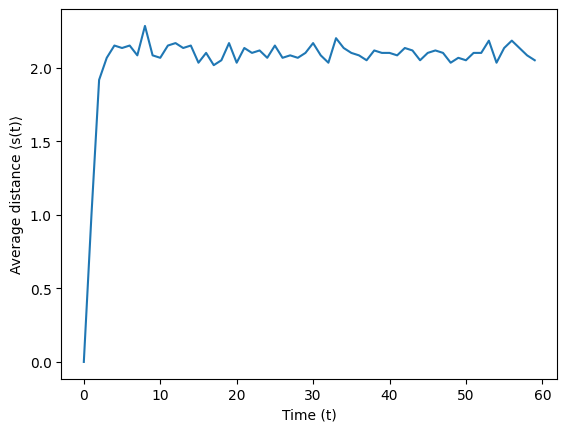

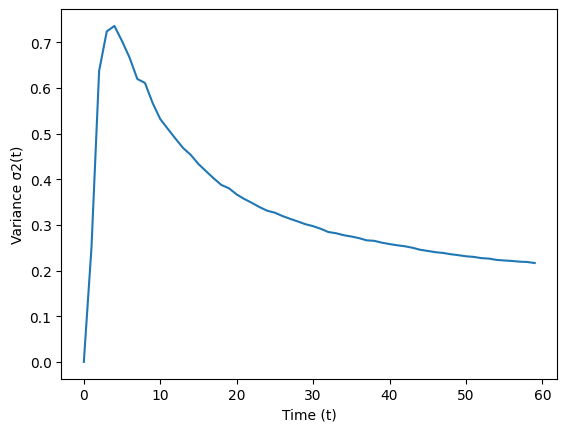

In [43]:
# Define the number of steps and repetitions
t_max = 60
repetitions = 60

# Initialize arrays to store the results
s_avg = np.zeros(t_max)
s_var = np.zeros(t_max)
s_all = np.zeros(t_max)
# Perform the random walks
for r in range(repetitions):
    # Select a random starting node
    start_node = np.random.randint(0, g.vcount())
    curr_node = start_node
    temp = []
    # Perform the random walk for each time step
    for t in range(t_max):
        print("\r", r,t, end="")
        # Get the shortest path lengths from the starting node to all other nodes
        s = g.distances(start_node, curr_node)[0]
        
        # Calculate the average and variance of the distance
        s_avg[t] += np.mean(s)
        temp.append(s)

        #if t > 2:
        s_var[t] += np.var(temp)

        # Take a random step to one of the neighboring nodes
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
      
# Calculate the averages over all repetitions
s_avg_p = s_avg / repetitions
s_var_p = s_var / repetitions

# Plot the results
plt.plot(s_avg_p)
plt.xlabel('Time (t)')
plt.ylabel('Average distance ⟨s(t)⟩')
plt.show()

plt.plot(s_var_p)
plt.xlabel('Time (t)')
plt.ylabel('Variance σ2(t)')
plt.show()


In [34]:
s_var = (s_avg/repetitions - np.mean(s_avg/repetitions))**2 / repetitions

In [9]:
import statistics
va = statistics.variance(s_avg)

9000


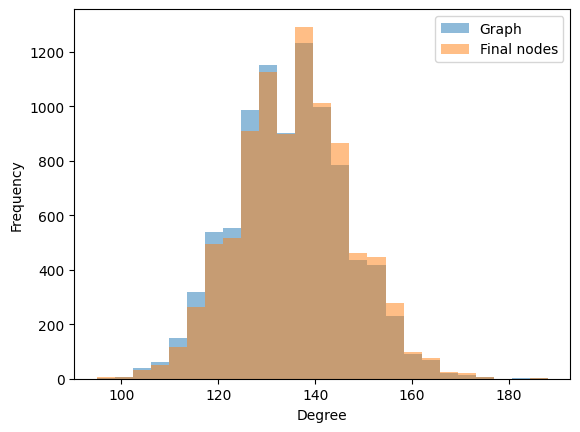

In [ ]:
# number of steps and repetitions
t_max = 50
repetitions = 9000
degrees = []

# random walks
for r in range(repetitions):
    # random starting node
    start_node = np.random.randint(0, g.vcount())
    
    # random walk
    for t in range(t_max):
        # random step
        neighbors = g.neighbors(start_node)
        if len(neighbors) > 0:
            start_node = np.random.choice(neighbors)
    
    # degree of the end node
    degrees.append(g.degree(start_node))

degrees = degrees
degrees2 = g.degree() 
print(g.vcount())

plt.hist(degrees2, bins=25, alpha=0.5, label='Graph')
plt.hist(degrees, bins=25, alpha=0.5, label='Final nodes')

plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# # Add the first node
# g.add_vertex(1)

# for i in range(2, 901):
#     degrees = g.degree()
    
#     # cumulative distribution
#     cd_degrees = [sum(degrees[0:i+1]) for i in range(len(degrees))]
    
#     # random node, probability proportional to degree
#     new_edge = (i-1, ig.discrete_sequence(1, values=cd_degrees).sample()[0])
    
#     g.add_vertex(i)
#     g.add_edge(*new_edge)



In [ ]:
import igraph as ig


g = ig.Graph()


g.add_vertices(2)
g.add_edge(0, 1)

# Define m = 1
m = 1

# Loop through the remaining nodes
for i in range(2, 900):
    # Choose m nodes to attach to, proportional to their degree
    probs = g.degree() / sum(g.degree())
    nodes_to_attach = list(np.random.choice(G.vcount(), size=m, replace=False, p=probs))
    
    # Add the new node and edges to the graph
    g.add_vertex(i)
    g.add_edges([(i, node) for node in nodes_to_attach])

print(f"The graph has {g.vcount()} nodes and {G.ecount()} edges.")

In [ ]:
g = ig.Graph.Barabasi(n=900, m=1)